In [173]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [174]:
df = pd.read_csv("pharmaceutical_data.csv")

In [175]:
df.head()

,Drug Name,Drug ID,Strength,Pack Size,Price,Expiry Date,Batch Number,Manufacture Date,Country of Origin,Drug Interactions,...,Geographic Region,Sales Volume,Manufacturer,Generic Drug Name,Route of Adminstration,Storage Conditions,Prescription Required,Therapeutic Class,Dosage Form,Adverse Reactions
0,Azee,53117687-8e75-4a5c-9ee6-214dc99d7501,780,44,25.90,2027-10-31,26077521-5fff-4787-90a0-742fae339f13,2022-05-29,Switzerland,Which appear experience of value material.,...,Jaipur,70,Cipla Ltd.,Azithromycin,Injectable,cold,yes,Pain relievers,Liquid,Drowsiness
1,Dolo-650,cd034bd8-eb76-4591-918c-c6d7f3ba4f1e,440,3,69.72,2026-01-04,483e6b86-d4a1-42fa-a682-f0b6f9af3c9d,2021-09-12,India,International ok treatment open treatment eye ...,...,Chennai,7,Micro Labs Limited,Paracetamol,Oral,normal,yes,Pain relievers,Tablet,Allergic Reactions
2,Azee,72c5f808-c24c-43bc-a37a-e20119e58659,254,40,439.48,2025-04-16,026167e1-c266-4304-8fd7-15bcbabcc3f7,2019-03-16,Germany,Wrong well nice may raise road.,...,Kolkata,78,Cipla Ltd.,Azithromycin,Injectable,cold,yes,Pain relievers,Liquid,Drowsiness
3,Pantocid,54707665-e2da-496e-bda7-f2a59785ecbd,633,42,392.85,2024-05-20,de39c145-7832-4955-8387-36166b866b4a,2019-11-16,Germany,Look add yet story.,...,Ahmedabad,26,Sun Pharmaceutical Industries Ltd.,Pantoprazole,Topical,cold,no,Antibiotics,Capsule,Drug Interactions
4,Dolo-650,595268d8-33ef-4a18-817b-b9deb05e0d9b,157,4,251.49,2026-06-05,aed34a8e-0c09-42f5-b7b0-186df12a6a6f,2023-09-03,United States,Similar open trip amount always also.,...,Mumbai,31,Micro Labs Limited,Paracetamol,Oral,normal,yes,Pain relievers,Tablet,Allergic Reactions


### Checking all the avaiable features & Dropping unwanted features (id's)

In [127]:
df.columns

Index(['Drug Name', 'Drug ID', 'Strength', 'Pack Size', 'Price', 'Expiry Date',
       'Batch Number', 'Manufacture Date', 'Country of Origin',
       'Drug Interactions', 'Patient Age Group', 'Patient Gender',
       'Patient Weight', 'Geographic Region', 'Sales Volume', 'Manufacturer',
       'Generic Drug Name', 'Route of Adminstration', 'Storage Conditions',
       'Prescription Required', 'Therapeutic Class', 'Dosage Form',
       'Adverse Reactions'],
      dtype='object')

In [128]:
df.drop(columns=['Drug ID', 'Batch Number'], inplace=True)

## Checking Null Values in data

<AxesSubplot:>

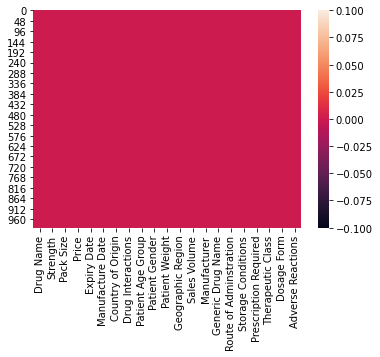

In [129]:
sns.heatmap(df.isnull())  ## Ploting heatmap to see if there is any null value or not --> At High level

In [130]:
df.isnull().sum()  # checking for no null values 

Drug Name                 0
Strength                  0
Pack Size                 0
Price                     0
Expiry Date               0
Manufacture Date          0
Country of Origin         0
Drug Interactions         0
Patient Age Group         0
Patient Gender            0
Patient Weight            0
Geographic Region         0
Sales Volume              0
Manufacturer              0
Generic Drug Name         0
Route of Adminstration    0
Storage Conditions        0
Prescription Required     0
Therapeutic Class         0
Dosage Form               0
Adverse Reactions         0
dtype: int64

In [131]:
### Checking if there is any duplicate row in data frame or not
df[df.duplicated()]  ## found no duplicate row in dataframe

,Drug Name,Strength,Pack Size,Price,Expiry Date,Manufacture Date,Country of Origin,Drug Interactions,Patient Age Group,Patient Gender,...,Geographic Region,Sales Volume,Manufacturer,Generic Drug Name,Route of Adminstration,Storage Conditions,Prescription Required,Therapeutic Class,Dosage Form,Adverse Reactions


## checking Descriptive parameters of data

In [132]:
df.describe()

,Strength,Pack Size,Price,Patient Weight,Sales Volume
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,497.086000,24.551000,254.965910,74.58700,51.621000
std,307.469807,14.271548,152.297606,14.35132,29.193417
min,1.000000,1.000000,3.610000,50.00000,1.000000
25%,225.000000,12.000000,124.427500,62.75000,25.000000
50%,487.500000,24.000000,254.295000,75.00000,52.000000
75%,751.750000,37.000000,378.957500,87.00000,77.000000
max,1809.000000,50.000000,1107.000000,100.00000,100.000000


In [133]:
df.columns

Index(['Drug Name', 'Strength', 'Pack Size', 'Price', 'Expiry Date',
       'Manufacture Date', 'Country of Origin', 'Drug Interactions',
       'Patient Age Group', 'Patient Gender', 'Patient Weight',
       'Geographic Region', 'Sales Volume', 'Manufacturer',
       'Generic Drug Name', 'Route of Adminstration', 'Storage Conditions',
       'Prescription Required', 'Therapeutic Class', 'Dosage Form',
       'Adverse Reactions'],
      dtype='object')

<AxesSubplot:>

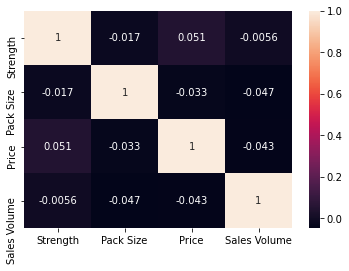

In [134]:
# Checking correlation
sns.heatmap(df[['Strength', 'Pack Size', 'Price', 'Sales Volume']].corr(), annot=True)

# There is poor correlation between overall price, strength, packsize, and sales volume probably because of various subcatagories which we will validate below

# Univariate Analysis 

In [135]:
df.columns

Index(['Drug Name', 'Strength', 'Pack Size', 'Price', 'Expiry Date',
       'Manufacture Date', 'Country of Origin', 'Drug Interactions',
       'Patient Age Group', 'Patient Gender', 'Patient Weight',
       'Geographic Region', 'Sales Volume', 'Manufacturer',
       'Generic Drug Name', 'Route of Adminstration', 'Storage Conditions',
       'Prescription Required', 'Therapeutic Class', 'Dosage Form',
       'Adverse Reactions'],
      dtype='object')

## Drug Name

In [136]:
print("*******There are ", len(df['Drug Name'].unique()), " different Drugs in the dataframe********\n\n")
df['Drug Name'].unique()

*******There are  10  different Drugs in the dataframe********




array(['Azee', 'Dolo-650', 'Pantocid', 'Crocin', 'Amoxyclav', 'Combiflam',
       'Omez', 'Atorva', 'Ciplox', 'Cetrizine'], dtype=object)

Text(0, 0.5, 'Count')

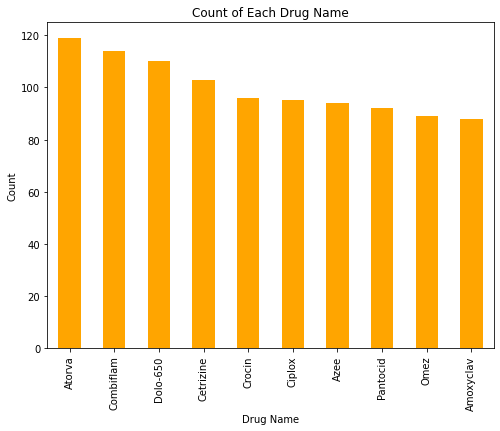

In [137]:
## Count of each type of drugs
df['Drug Name'].value_counts().plot(kind='bar', figsize=(8, 6), color='orange')
plt.title('Count of Each Drug Name')
plt.xlabel('Drug Name')
plt.ylabel('Count')



In [138]:
df['Drug Name'].value_counts()
#Cetizine has occured the most number of time in sample

Drug Name
Atorva       119
Combiflam    114
Dolo-650     110
Cetrizine    103
Crocin        96
Ciplox        95
Azee          94
Pantocid      92
Omez          89
Amoxyclav     88
Name: count, dtype: int64

## Country of Origin

In [139]:
df['Country of Origin'].unique()

# 4 different countries as country of origin

array(['Switzerland', 'India', 'Germany', 'United States'], dtype=object)

Text(0, 0.5, 'Count')

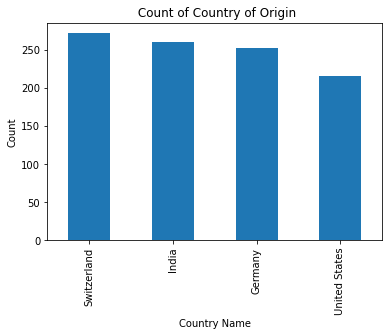

In [140]:
df['Country of Origin'].value_counts().plot(kind='bar', figsize = (6,4))
plt.title(" Count of Country of Origin")
plt.xlabel("Country Name")
plt.ylabel('Count')

In [141]:
df['Country of Origin'].value_counts()

Country of Origin
Switzerland      272
India            260
Germany          252
United States    216
Name: count, dtype: int64

## Manufacturer

In [142]:
df['Manufacturer'].unique() # 6 different Manufacturer

array(['Cipla Ltd.', 'Micro Labs Limited',
       'Sun Pharmaceutical Industries Ltd.',
       'GlaxoSmithKline Pharmaceuticals Limited', 'Sanofi India Limited',
       "Dr. Reddy's Laboratories Ltd."], dtype=object)

Text(0, 0.5, 'Count')

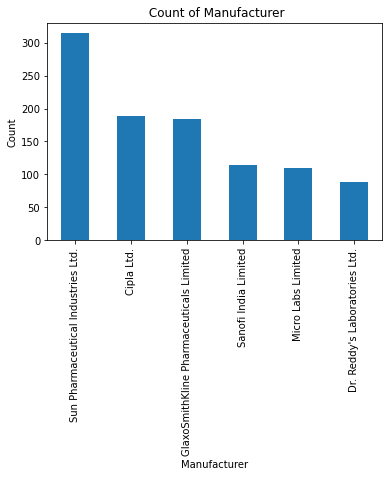

In [143]:
df['Manufacturer'].value_counts().plot(kind='bar', figsize = (6,4))
plt.title(" Count of Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel('Count')

In [144]:
df['Manufacturer'].value_counts()

Manufacturer
Sun Pharmaceutical Industries Ltd.         314
Cipla Ltd.                                 189
GlaxoSmithKline Pharmaceuticals Limited    184
Sanofi India Limited                       114
Micro Labs Limited                         110
Dr. Reddy's Laboratories Ltd.               89
Name: count, dtype: int64

## 'Generic Drug Name'

In [145]:
df['Generic Drug Name'].unique()
# 9 different genric drugs

array(['Azithromycin', 'Paracetamol', 'Pantoprazole',
       'Amoxicillin + Clavulanic Acid', 'Ibuprofen + Paracetamol',
       'Omeprazole', 'Atorvastatin', 'Ciprofloxacin', 'Cetirizine'],
      dtype=object)

Text(0, 0.5, 'Count')

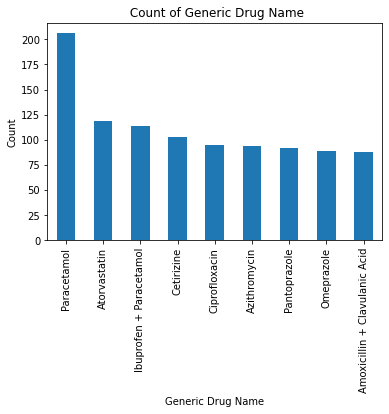

In [146]:
df['Generic Drug Name'].value_counts().plot(kind='bar', figsize = (6,4))
plt.title(" Count of Generic Drug Name")
plt.xlabel('Generic Drug Name')
plt.ylabel('Count')

In [147]:
df['Generic Drug Name'].value_counts()

Generic Drug Name
Paracetamol                      206
Atorvastatin                     119
Ibuprofen + Paracetamol          114
Cetirizine                       103
Ciprofloxacin                     95
Azithromycin                      94
Pantoprazole                      92
Omeprazole                        89
Amoxicillin + Clavulanic Acid     88
Name: count, dtype: int64

## 'Geographic Region'

In [148]:
df['Geographic Region'].unique()

array(['Jaipur', 'Chennai', 'Kolkata', 'Ahmedabad', 'Mumbai', 'Hyderabad',
       'Bangalore', 'Pune', 'Delhi', 'Surat'], dtype=object)

Text(0, 0.5, 'Count')

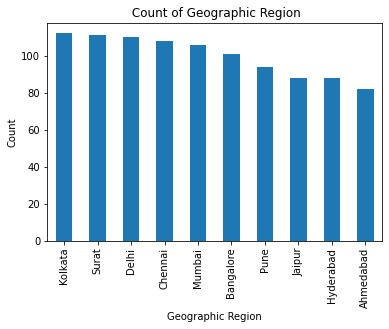

In [149]:
df['Geographic Region'].value_counts().plot(kind='bar', figsize = (6,4))
plt.title(" Count of Geographic Region")
plt.xlabel('Geographic Region')
plt.ylabel('Count')

In [150]:
df['Geographic Region'].value_counts()

Geographic Region
Kolkata      112
Surat        111
Delhi        110
Chennai      108
Mumbai       106
Bangalore    101
Pune          94
Jaipur        88
Hyderabad     88
Ahmedabad     82
Name: count, dtype: int64

## Patient Age Group

In [151]:
df['Patient Age Group'].unique() # 3 age group

array(['Adult', 'Elderly', 'Pediatric'], dtype=object)

Text(0, 0.5, 'Count')

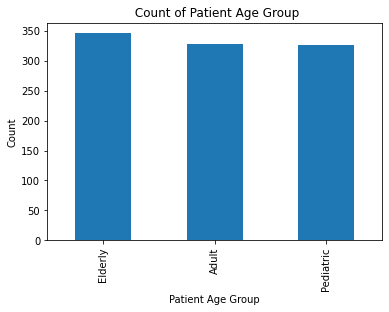

In [152]:
df['Patient Age Group'].value_counts().plot(kind='bar', figsize = (6,4))
plt.title(" Count of Patient Age Group")
plt.xlabel("Patient Age Group")
plt.ylabel('Count')

df['Patient Age Group'].value_counts()

## 'Patient Gender'

In [153]:

df['Patient Gender'].value_counts()

Patient Gender
Male      502
Female    498
Name: count, dtype: int64

# Outlier Analysis

In [154]:
df.columns

Index(['Drug Name', 'Strength', 'Pack Size', 'Price', 'Expiry Date',
       'Manufacture Date', 'Country of Origin', 'Drug Interactions',
       'Patient Age Group', 'Patient Gender', 'Patient Weight',
       'Geographic Region', 'Sales Volume', 'Manufacturer',
       'Generic Drug Name', 'Route of Adminstration', 'Storage Conditions',
       'Prescription Required', 'Therapeutic Class', 'Dosage Form',
       'Adverse Reactions'],
      dtype='object')

<AxesSubplot:xlabel='Pack Size'>

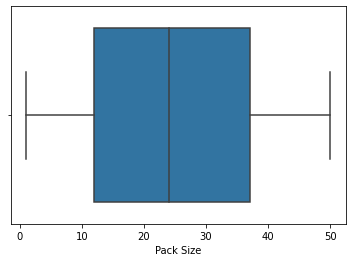

In [160]:
sns.boxplot(df["Pack Size"]) # no outlier

<AxesSubplot:xlabel='Strength'>

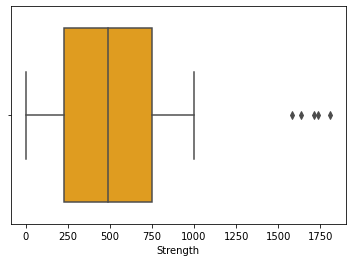

In [164]:
sns.boxplot(df['Strength'], color='orange') #Outlier indetified

<AxesSubplot:xlabel='Sales Volume'>

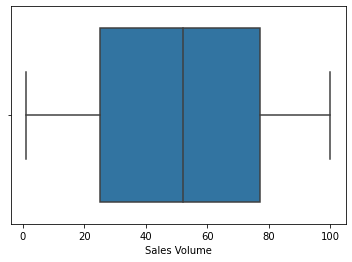

In [163]:
sns.boxplot(df['Sales Volume']) # no outlier indetified

<AxesSubplot:xlabel='Price'>

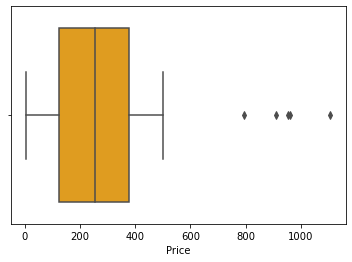

In [176]:
sns.boxplot(df['Price'],color='orange')## Outlier indentified

# Outlier treatmeant

In [167]:
def outlier_treatment(df , col_name):
    upper_boundary = df[col_name].mean() + 3*df[col_name].std()
    lower_boundary = df[col_name].mean()  - 3*df[col_name].std()
    return upper_boundary, lower_boundary

In [177]:
ub_str, lb_str = outlier_treatment(df, 'Strength' ) # getting upper and lower limits for strenght data
ub_price, lb_price = outlier_treatment(df, 'Price') # getting upper and lower limits for price data

In [178]:
df = df[df['Strength'] <=ub_str]
df = df[df['Price'] <= ub_price]


<AxesSubplot:xlabel='Strength'>

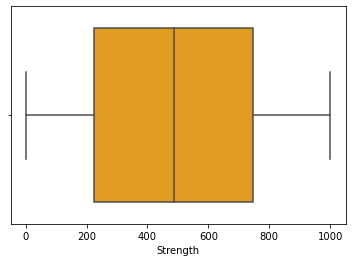

In [181]:
sns.boxplot(df['Strength'], color='orange') #treated  Strength

<AxesSubplot:xlabel='Price'>

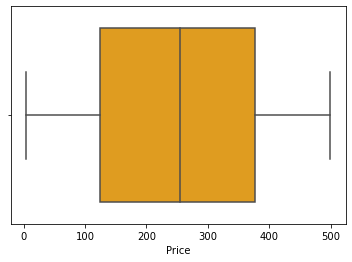

In [182]:
sns.boxplot(df['Price'],color='orange')## treated Price

#  Bivariate Analysis

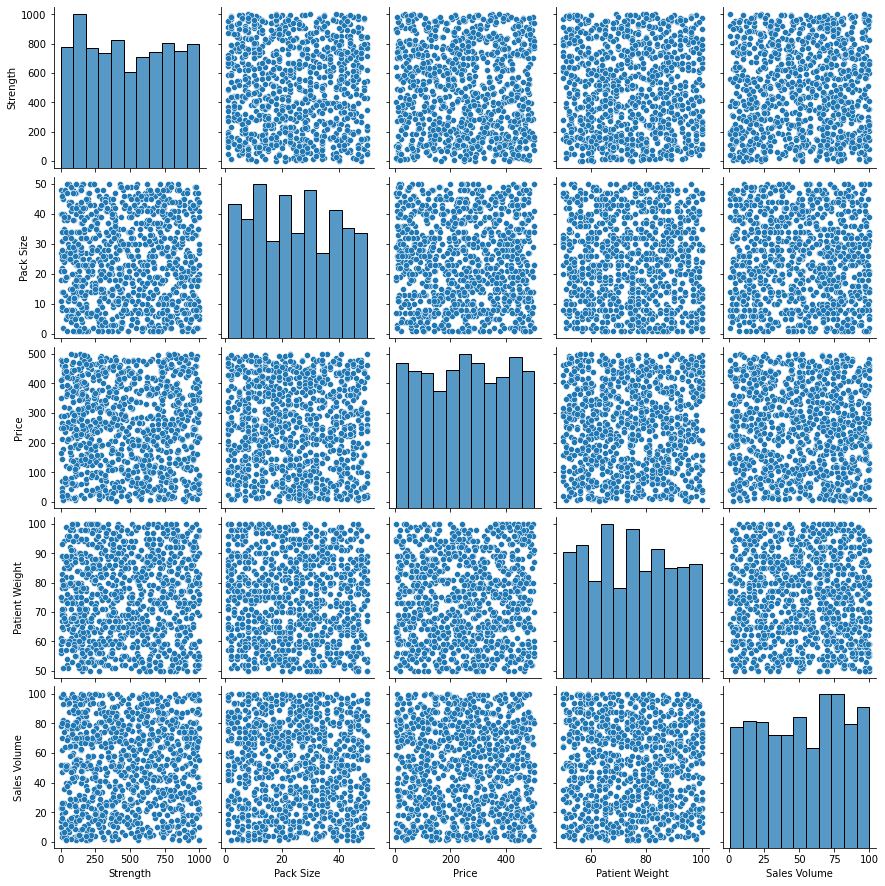

In [193]:
sns.pairplot(df)

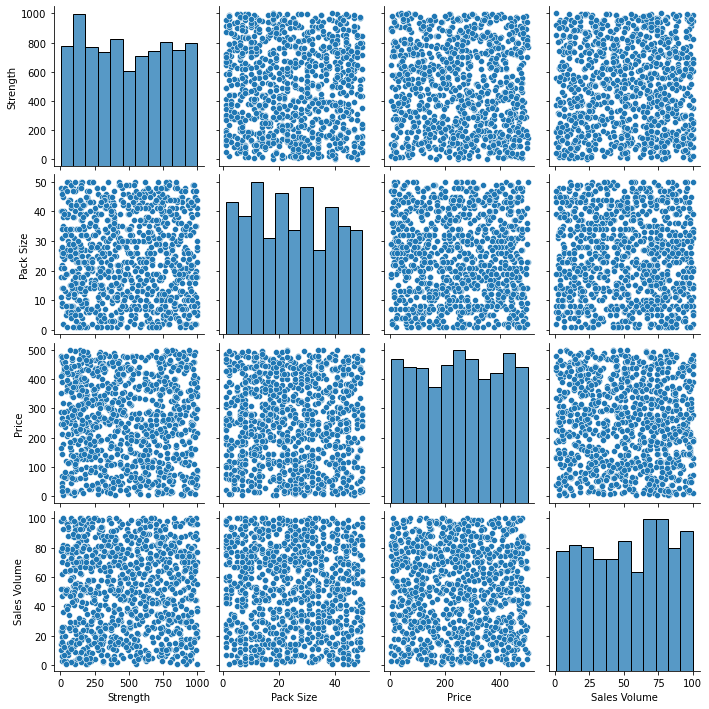

In [195]:
sns.pairplot(df[['Strength', 'Pack Size', 'Price','Sales Volume']])## Data seems to be normally distributed 

In [196]:
df.columns

Index(['Drug Name', 'Drug ID', 'Strength', 'Pack Size', 'Price', 'Expiry Date',
       'Batch Number', 'Manufacture Date', 'Country of Origin',
       'Drug Interactions', 'Patient Age Group', 'Patient Gender',
       'Patient Weight', 'Geographic Region', 'Sales Volume', 'Manufacturer',
       'Generic Drug Name', 'Route of Adminstration', 'Storage Conditions',
       'Prescription Required', 'Therapeutic Class', 'Dosage Form',
       'Adverse Reactions'],
      dtype='object')

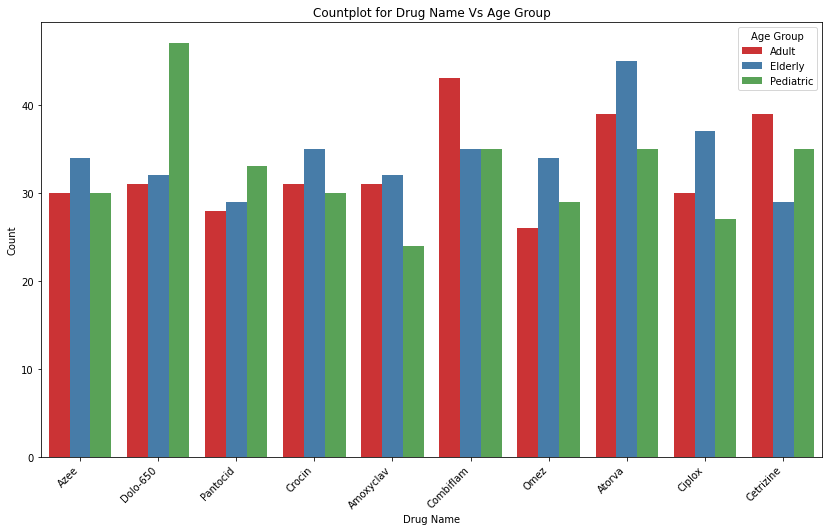

In [201]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Drug Name', hue='Patient Age Group', palette='Set1')
plt.title('Countplot for Drug Name Vs Age Group')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45, ha='right') 
plt.show()

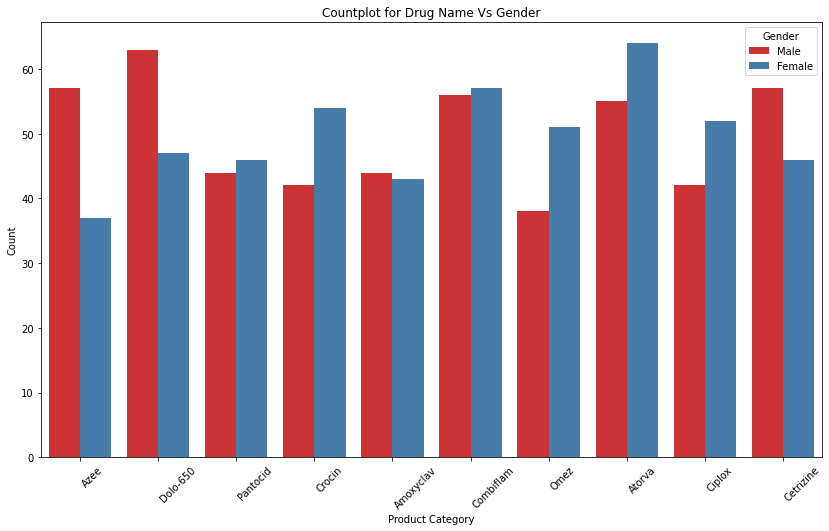

In [202]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Drug Name', hue='Patient Gender', palette='Set1')
plt.title('Countplot for Drug Name Vs Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='left') 
plt.show()

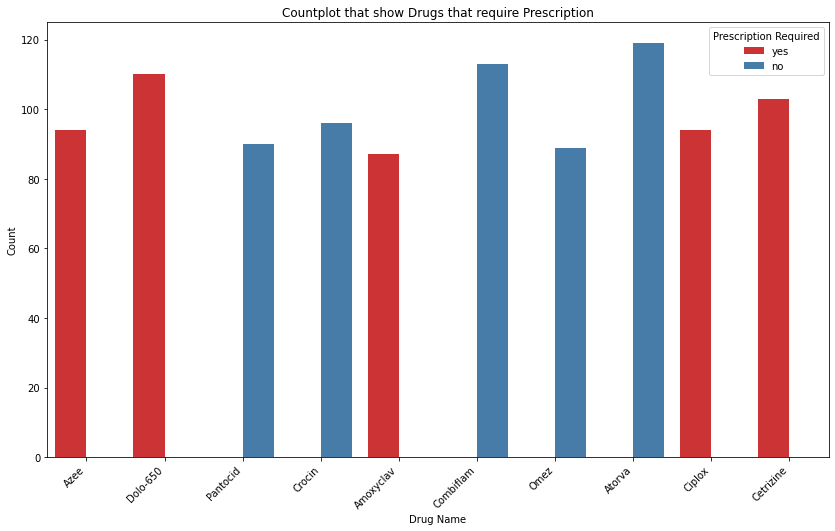

In [205]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Drug Name', hue='Prescription Required', palette='Set1')
plt.title('Countplot that show Drugs that require Prescription')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.legend(title='Prescription Required')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Correlation in 'Strength', 'Pack Size', 'Price', 'Sales Volume' at Drug Level

Checking correlation for Drug  Azee


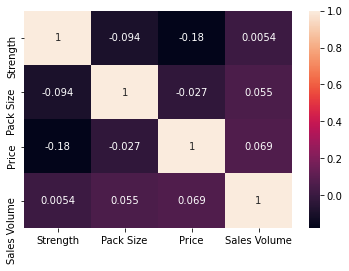

Checking correlation for Drug  Dolo-650


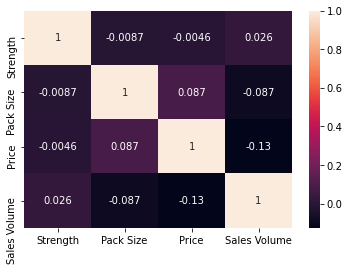

Checking correlation for Drug  Pantocid


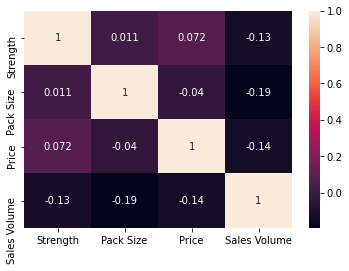

Checking correlation for Drug  Crocin


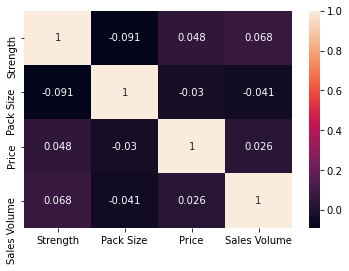

Checking correlation for Drug  Amoxyclav


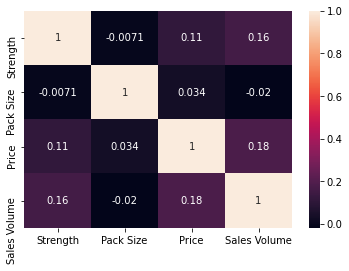

Checking correlation for Drug  Combiflam


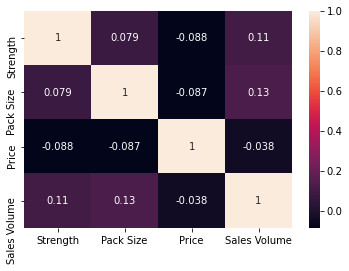

Checking correlation for Drug  Omez


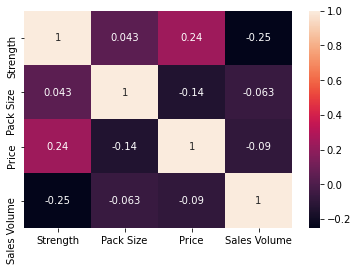

Checking correlation for Drug  Atorva


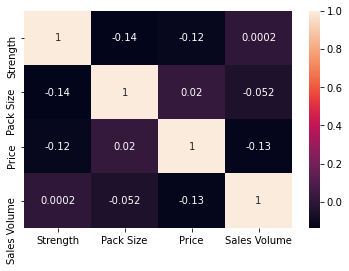

Checking correlation for Drug  Ciplox


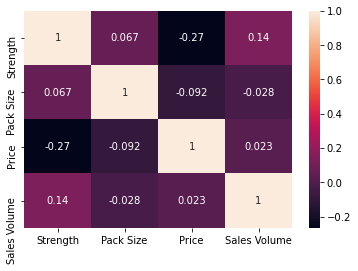

Checking correlation for Drug  Cetrizine


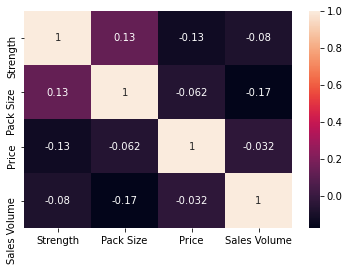

In [226]:

for drug in df['Drug Name'].unique():
    print("Checking correlation for Drug ", drug)
    plt.subplot()
    sns.heatmap(df[df['Drug Name']== drug][['Strength', 'Pack Size', 'Price', 'Sales Volume']].corr(), annot=True)
    plt.show()
# There is slight to no correlation at drug level also

In [206]:
df.describe()

,Strength,Pack Size,Price,Patient Weight,Sales Volume
count,995.000000,995.000000,995.000000,995.000000,995.000000
mean,491.070352,24.581910,251.496392,74.568844,51.694472
std,296.204075,14.255151,144.399080,14.360410,29.182923
min,1.000000,1.000000,3.610000,50.000000,1.000000
25%,224.500000,12.000000,124.035000,62.000000,25.500000
50%,486.000000,24.000000,253.850000,75.000000,52.000000
75%,747.500000,37.000000,377.195000,87.000000,77.000000
max,1000.000000,50.000000,499.400000,100.000000,100.000000
